# Timeseries Analysis and Forcasting

### Importing Data

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

timeseries_df = pd.read_csv('../data/processed_data/timeseries.csv')
predicted_clv_df = pd.read_csv('../data/processed_data/predicted_clv.csv')

In [189]:
df = predicted_clv_df.merge(timeseries_df, on='customer_id', how='left')
df.drop_duplicates(subset='customer_id', inplace=True)
df.head()

,customer_id,recency,frequency,price_sum,price_mean,spend_90_total,date,quantity,price,month,year,dayofweek,day
0,1,-455,1,11.77,11.770000,0.694328,1997-01-01,1,11.77,January,1997,2,Wednesday
1,2,-444,2,89.00,44.500000,1.529271,1997-01-12,1,12.00,January,1997,6,Sunday
3,3,-127,5,139.47,27.894000,7.942017,1997-01-02,2,20.76,January,1997,3,Thursday
9,4,-110,4,100.50,25.125000,7.260218,1997-01-01,2,29.33,January,1997,2,Wednesday
13,5,-88,11,385.61,35.055455,19.369946,1997-01-01,2,29.33,January,1997,2,Wednesday


### Weekly Revenue Trend and Decomposition

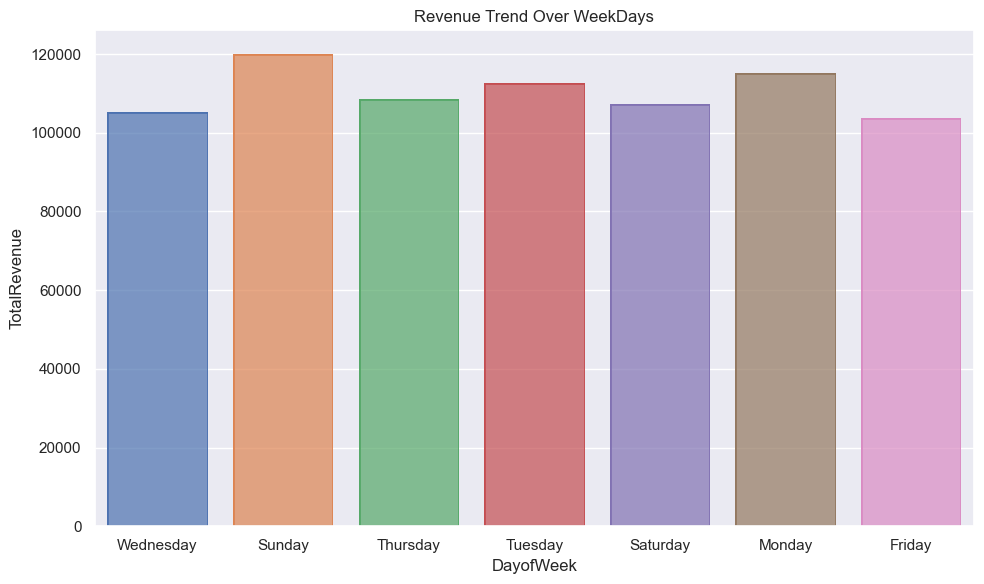

In [190]:
p = so.Plot(df, 'day', 'price', color='day').layout(size=(10, 6)) 
p = p.add(so.Bar(), so.Agg('sum'), legend=False)
p = p.label(x='DayofWeek', y='TotalRevenue', title='Revenue Trend Over WeekDays')
p.show()

In [199]:
df[df['year'] == 1997].groupby('month').count()

,customer_id,recency,frequency,price_sum,price_mean,spend_90_total,date,quantity,price,year,dayofweek,day
month,,,,,,,,,,,,
February,8476,8476,8476,8476,8476,8476,8476,8476,8476,8476,8476,8476
January,7846,7846,7846,7846,7846,7846,7846,7846,7846,7846,7846,7846
March,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248


### Forcasted Revenue Per Month


In [194]:
df_monthly

month
February    48155.253448
January     47650.461922
March       39958.268387
Name: spend_90_total, dtype: float64

In [193]:
df_monthly = df.groupby('month')['spend_90_total'].sum()
fig = px.line(df, x='date', y='spend_90_total')
fig.show()